We start by importing the necessary libraries and the dataset requred for the project

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# import data
df = pd.read_csv('../data/birds.csv')
print(df.head())

                           Name          ScientificName  \
0  Black-bellied whistling-duck  Dendrocygna autumnalis   
1        Fulvous whistling-duck     Dendrocygna bicolor   
2                    Snow goose      Anser caerulescens   
3                  Ross's goose            Anser rossii   
4   Greater white-fronted goose         Anser albifrons   

                Category         Order    Family        Genus  \
0  Ducks/Geese/Waterfowl  Anseriformes  Anatidae  Dendrocygna   
1  Ducks/Geese/Waterfowl  Anseriformes  Anatidae  Dendrocygna   
2  Ducks/Geese/Waterfowl  Anseriformes  Anatidae        Anser   
3  Ducks/Geese/Waterfowl  Anseriformes  Anatidae        Anser   
4  Ducks/Geese/Waterfowl  Anseriformes  Anatidae        Anser   

  ConservationStatus  MinLength  MaxLength  MinBodyMass  MaxBodyMass  \
0                 LC       47.0       56.0        652.0       1020.0   
1                 LC       45.0       53.0        712.0       1050.0   
2                 LC       64.0       

Let get a sense of the data by plotting the number of birds per category.

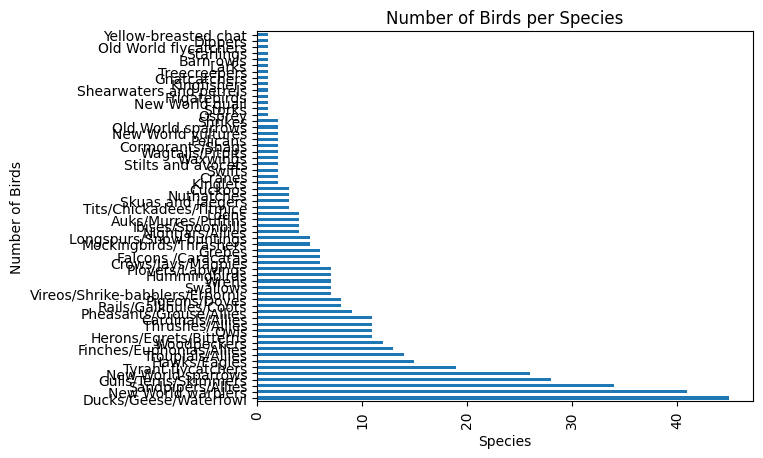

In [8]:

df['Category'].value_counts().plot(kind='barh')
plt.title('Number of Birds per Species')
plt.xlabel('Species')
plt.ylabel('Number of Birds')
plt.xticks(rotation=90)
plt.show()